In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
np.random.seed(42)

In [2]:
def sigmoid(z):
    return 1/(1+math.exp(-z))

def visualise(X,y):
    plt.scatter(X,y,alpha=0.7, marker='.', )
    plt.xlabel('features')
    plt.ylabel('target')
    

In [3]:
def fwrd_prop(x,weight):
    z_1 = np.dot(x,parameters[0])+parameters[1]
    activation_1 = tanh(z_1)
    z_2 = np.dot(activation_1, parameters[2])+parameters[3]
    actication_2 = sigmoid(z_2)
    forward = [z_1, actication_1, z_2, actication_2]
    return forward

In [4]:
sample_size = 200
n_input_features = 1
learning_rate = 0.05
n_iterations = 100

In [5]:
from sklearn.datasets import make_regression

In [6]:
features, target = make_regression(n_samples=sample_size, 
                                   n_features= n_input_features, 
                                   n_informative = n_input_features, 
                                   noise=15)

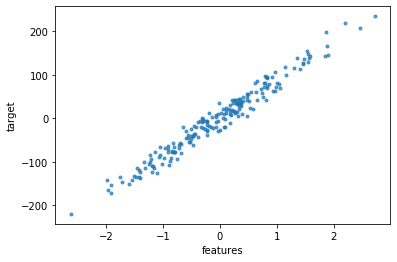

In [7]:
visualise(features, target)

In [8]:
def reset_size(*list):
    return tuple(lis.reshape((lis.shape[0], 1)) for lis in list)

In [9]:
features, target = reset_size(features,target)
target.shape

(200, 1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(140, 1) (140, 1)
(60, 1) (60, 1)


In [13]:
def initial_parameters():
    m = np.random.normal(scale =20)
    b = np.random.normal(scale =20)
    return m,b

In [14]:
m,b = initial_parameters()

In [15]:
def visualise(data, pred_line=None):
    X,y= data['X'], data['y']
    _ = plt.scatter(X,y,alpha = 0.7, marker = '.')
    
    if pred_line!=None:
        x_line, y_line = pred_line['x_line'], pred_line['y_line']
        _ = plt.plot(x_line,y_line, linewidth=3,markersize=12,
                              color='red', alpha =0.9)
        _=plt.title('Random line on data points')
    else:
        _ = plt.title('Plot of datapoints')

In [16]:
def plot_pred_line(X,y,m,b):
    x_line = np.linspace(np.min(X), np.max(X), 20)
    y_line = m*x_line + b
    dataset = {'X':X, 
              'y':y}
    
    pred_line = {'x_line': x_line, 'y_line':y_line}
    visualise(dataset, pred_line)
    return

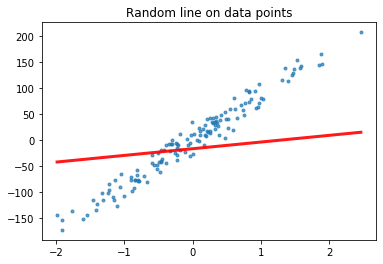

In [17]:
scatter = plot_pred_line(X_train,y_train,m,b)

In [18]:
def forward_prop(X,m,b):
    y_predict = m*X +b
    return y_predict

In [19]:
y_predict = forward_prop(X_train,m,b)

In [20]:

def linreg_cost(y,y_pred):
    loss= 1/2 *np.mean((y-y_pred)**2)
    return loss

In [21]:
def visualise(data, pred_line=None,losses=None):
    plots=2 if losses!=None else 1
    
    fig = plt.figure(figsize=(8*plots, 6))
    
    X,y= data['X'], data['y']
    
    ax1 = plt.add_subplot(1,plots,1)
    
    ax1.scatter(X,y,alpha = 0.7, marker = '.')
    
    if pred_line!=None:
        x_line, y_line = pred_line['x_line'], pred_line['y_line']
        ax1.plot(x_line,y_line, linewidth=2,markersize=12,
                              color='red', alpha =0.9)
        ax1.set_title('Random line on data points')
    else:
        ax1.set_title('Plot of datapoints generated')
    
    ax1.set_xlabel('features')
    ax1.set_ylabel('target')
    
    if losses!=None:
        ax2 = fig.add_subplot(1,plots,2)
        ax2.plot(np.arange(len(losses)),losses, marker='.')
        ax2.set_xlabel('No of iterations')
        ax2.set_ylabel('Loss')
        ax2.set_title('Loss')
    
def plot_pred_line(X,y,m,b,losses=None):
    x_line = np.linspace(np.min(X), np.max(X), 20)
    y_line = m*x_line + b
    dataset = {'X':X, 
              'y':y}
    
    pred_line = {'x_line': x_line, 'y_line':y_line}
    visualise(dataset, pred_line, losses)
    return

In [22]:
losses = []
loss = linreg_cost(y_train, y_predict)
losses.append(loss)

In [23]:
print(loss)

2305.284524153062


In [24]:
def derivative_terms(X_train,y_train,y_predict,m,b):
    dm= np.mean((y_predict - y_train)*X_train)
    db= np.mean(y_predict - y_train)
    return dm, db

In [25]:
def para_update(dm,db,m,b,learning_rate):
    m-= learning_rate*dm
    b-= learning_rate*db

In [26]:
def grad_desc(X_train,y_train,y_predict,m,b,learning_rate):
    dm,db = derivative_terms(X_train,y_train,y_predict, m,b)
    m,b = para_update(dm,db,m,b,learning_rate)
    return m,b

In [36]:
features, target = make_regression(n_samples=sample_size, 
                                   n_features= n_input_features, 
                                   n_informative = n_input_features, 
                                   noise=15)

dataset = {'X': features, 'y': target}

#visualise(dataset)

m, b = initial_parameters()

features, target = reset_size(features,target)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.3)

losses = []

for i in range(n_iterations):
    y_predict = forward_prop(X_train, m, b)

    loss = linreg_cost(y_train, y_predict)
    losses.append(loss)

    m, b = grad_desc(X_train, y_train, y_predict, m, b, learning_rate)

    #if(i%10==0):
        #print('Epoch: ', i)
        #print('Loss = ', loss)
      #  plot_pred_line(X_train, y_train, m, b, losses)

#del losses[:]


TypeError: cannot unpack non-iterable NoneType object